<a href="https://colab.research.google.com/github/chamssal/blue_white_game/blob/main/20251_ComputerVision_Assignment_4_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8%E1%84%8F%E1%85%A9%E1%84%83%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor 실습

In [1]:
import torch

# 스칼라
x_scalar = torch.tensor(3.0)
print("Scalar:", x_scalar)

# 벡터
x_vector = torch.tensor([1.0, 2.0, 3.0])
print("Vector:", x_vector)

# 행렬
x_matrix = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("Matrix:\n", x_matrix)

# 3차원 텐서
x_3d = torch.zeros((2, 3, 4))  # shape: (2, 3, 4)
print("3D Tensor shape:", x_3d.shape)


Scalar: tensor(3.)
Vector: tensor([1., 2., 3.])
Matrix:
 tensor([[1., 2.],
        [3., 4.]])
3D Tensor shape: torch.Size([2, 3, 4])


Tensor 연산 실습

In [2]:
import torch

# 두 텐서 정의
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])
c = torch.tensor([3.0, 4.0, 5.0])
# 덧셈
add = a + b
add2 = add + c
print("덧셈:", add)
print("add2", add2)
# 뺄셈
sub = a - b
print("뺄셈:", sub)

# 곱셈 (요소별 곱)
mul = a * b
print("곱셈 (요소별):", mul)

# 나눗셈 (요소별)
div = a / b
print("나눗셈 (요소별):", div)


덧셈: tensor([5., 7., 9.])
add2 tensor([ 8., 11., 14.])
뺄셈: tensor([-3., -3., -3.])
곱셈 (요소별): tensor([ 4., 10., 18.])
나눗셈 (요소별): tensor([0.2500, 0.4000, 0.5000])


Tensor 연산 실습 2

In [3]:
# 내적 (dot product)
dot = torch.dot(a, b)
print("내적:", dot.item())

# 행렬곱 (Matrix Multiplication)
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
B = torch.tensor([[5.0, 6.0], [7.0, 8.0]])
matmul = torch.matmul(A, B)
print("행렬곱:\n", matmul)


내적: 32.0
행렬곱:
 tensor([[19., 22.],
        [43., 50.]])


간단한 미분값 확인

In [4]:
import torch

# x에 대해 미분을 추적하도록 requires_grad=True 설정
x = torch.tensor([2.0], requires_grad=True)

# y = x^2 + 2x + 3
y = x**2 + 2 * x + 3

# backward() 호출로 그래디언트 계산
y.backward()

# 결과 출력
print("x =", x.item())  # 스칼라값을 float 형태로 뽑기
print("y =", y.item())
print("dy/dx =", x.grad.item())  # y' = 2x + 2 → x=2일 때 6


x = 2.0
y = 11.0
dy/dx = 6.0


학습 예시

In [5]:
import torch

# 학습시킬 변수 정의
x = torch.tensor([2.0], requires_grad=True)  #x는 미분가능한 텐서가 된다. 나중에 x에 대한 기울기를 자동으로 계산해서 x.grad에 넣어주게 된다.

# 옵티마이저 설정 (SGD로 학습 진행, x를 학습, learning rate=0.1)
# 옵티마이저는 손실 함수의 결과를 줄이기 위해 파라미터를 업데이트 한다.
optimizer = torch.optim.SGD([x], lr=0.1)

# 학습
for epoch in range(25):
    optimizer.zero_grad()  # 그래디언트 초기화

    # 손실 함수 정의
    y = x**2 + 2 * x + 3

    # 역전파 (미분)
    y.backward()

    # 파라미터 업데이트
    optimizer.step()
    # x = x - lr * grad = 5.0 - 0.1 * 12 = 3.8
    # 현재 상태 출력
    print(f"Epoch {epoch+1:02d}: x = {x.item():.4f}, y = {y.item():.4f}")


Epoch 01: x = 1.4000, y = 11.0000
Epoch 02: x = 0.9200, y = 7.7600
Epoch 03: x = 0.5360, y = 5.6864
Epoch 04: x = 0.2288, y = 4.3593
Epoch 05: x = -0.0170, y = 3.5099
Epoch 06: x = -0.2136, y = 2.9664
Epoch 07: x = -0.3709, y = 2.6185
Epoch 08: x = -0.4967, y = 2.3958
Epoch 09: x = -0.5973, y = 2.2533
Epoch 10: x = -0.6779, y = 2.1621
Epoch 11: x = -0.7423, y = 2.1038
Epoch 12: x = -0.7938, y = 2.0664
Epoch 13: x = -0.8351, y = 2.0425
Epoch 14: x = -0.8681, y = 2.0272
Epoch 15: x = -0.8944, y = 2.0174
Epoch 16: x = -0.9156, y = 2.0111
Epoch 17: x = -0.9324, y = 2.0071
Epoch 18: x = -0.9460, y = 2.0046
Epoch 19: x = -0.9568, y = 2.0029
Epoch 20: x = -0.9654, y = 2.0019
Epoch 21: x = -0.9723, y = 2.0012
Epoch 22: x = -0.9779, y = 2.0008
Epoch 23: x = -0.9823, y = 2.0005
Epoch 24: x = -0.9858, y = 2.0003
Epoch 25: x = -0.9887, y = 2.0002


다변수 학습

In [6]:
import torch

# 학습시킬 변수 정의
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

# 옵티마이저 설정 (x,y가 학습 대상, learning_rate 0.05)
optimizer = torch.optim.Adam([x, y], lr=0.05)

# 학습
for epoch in range(100):
    optimizer.zero_grad()

    # 손실 함수 정의: z(x, y)
    z = (x - 2)**2 + (y + 3)**2 + torch.sin(x * y)

    # 역전파
    z.backward()

    # 파라미터 업데이트
    optimizer.step()

    # 현재 상태 출력
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d} | x = {x.item():.4f}, y = {y.item():.4f}, z = {z.item():.4f}")


Epoch   1 | x = 0.0500, y = -0.0500, z = 13.0000
Epoch  10 | x = 0.4977, y = -0.4985, z = 8.7156
Epoch  20 | x = 0.9799, y = -0.9873, z = 4.6159
Epoch  30 | x = 1.3957, y = -1.4367, z = 2.0367
Epoch  40 | x = 1.6105, y = -1.7762, z = 1.3898
Epoch  50 | x = 1.5775, y = -1.9808, z = 1.2208
Epoch  60 | x = 1.4098, y = -2.1007, z = 0.9995
Epoch  70 | x = 1.2211, y = -2.1874, z = 0.8252
Epoch  80 | x = 1.0927, y = -2.2751, z = 0.7445
Epoch  90 | x = 1.0446, y = -2.3688, z = 0.6965
Epoch 100 | x = 1.0322, y = -2.4519, z = 0.6655


다변수 함수 visualize

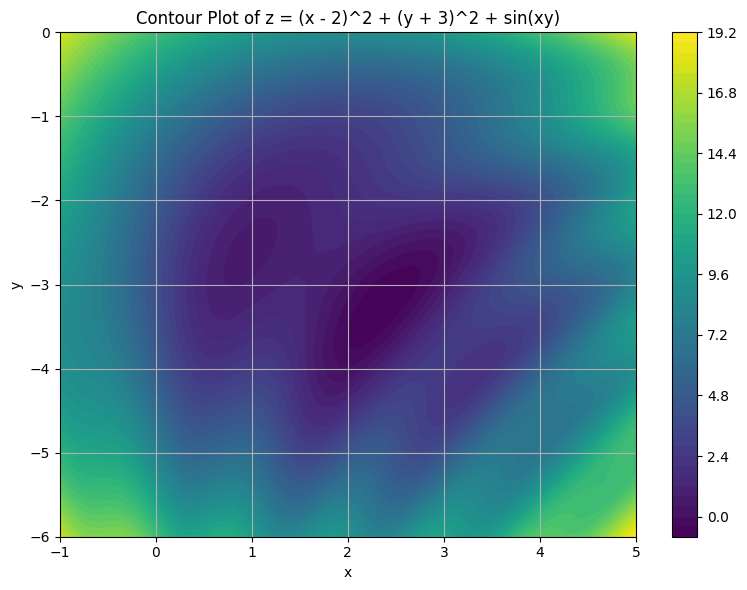

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 좌표 그리드 정의
x_vals = np.linspace(-1, 5, 100)
y_vals = np.linspace(-6, 0, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# 함수 정의: z = (x - 2)^2 + (y + 3)^2 + sin(xy)
Z = (X - 2)**2 + (Y + 3)**2 + np.sin(X * Y)

# 등고선 그리기
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Contour Plot of z = (x - 2)^2 + (y + 3)^2 + sin(xy)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()  # 그래프 요소들이 겹치지 않게 자동으로 여백을 조정해주는 함수
plt.show()


다변수 함수 학습 과정 visualize - low learning rate

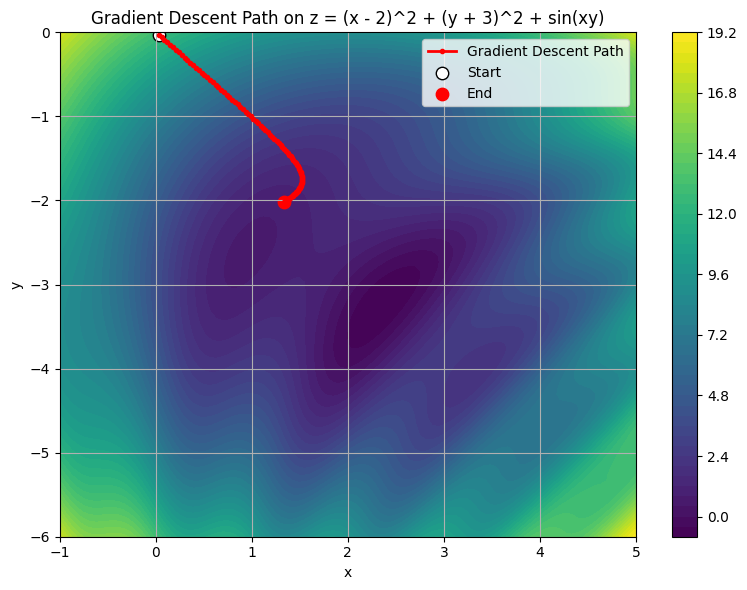

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 경로 저장 리스트
x_path = []
y_path = []

# 초기값 설정
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

optimizer = torch.optim.Adam([x, y], lr=0.03)
# 너무 작게 하면, 멀리 못가버리고 너무 멀게 하면 너어무 크게 요동치고 엉뚱한 곳을 가게 된다.

# 학습 진행
for _ in range(100):
    optimizer.zero_grad()
    z = (x - 2)**2 + (y + 3)**2 + torch.sin(x * y)
    z.backward() # 먼저 미분을 해주고
    optimizer.step() # 파라미터를 실제로 업데이트 해주는 함수

    # 현재 좌표 저장
    x_path.append(x.item())
    y_path.append(y.item())

# 그래프를 위한 mesh grid 준비
x_vals = np.linspace(-1, 5, 100)  # 연속적인 숫자들을 일정한 간격으로 생성할 때 쓰는 함수
y_vals = np.linspace(-6, 0, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 2)**2 + (Y + 3)**2 + np.sin(X * Y)

# 등고선과 이동 경로 그리기
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(x_path, y_path, color='red', marker='o', markersize=3, linewidth=2, label='Gradient Descent Path')
plt.scatter(x_path[0], y_path[0], color='white', edgecolors='black', s=80, label='Start')
plt.scatter(x_path[-1], y_path[-1], color='red', s=80, label='End')
plt.title("Gradient Descent Path on z = (x - 2)^2 + (y + 3)^2 + sin(xy)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


다변수 함수 학습 과정 visualize - high learning rate

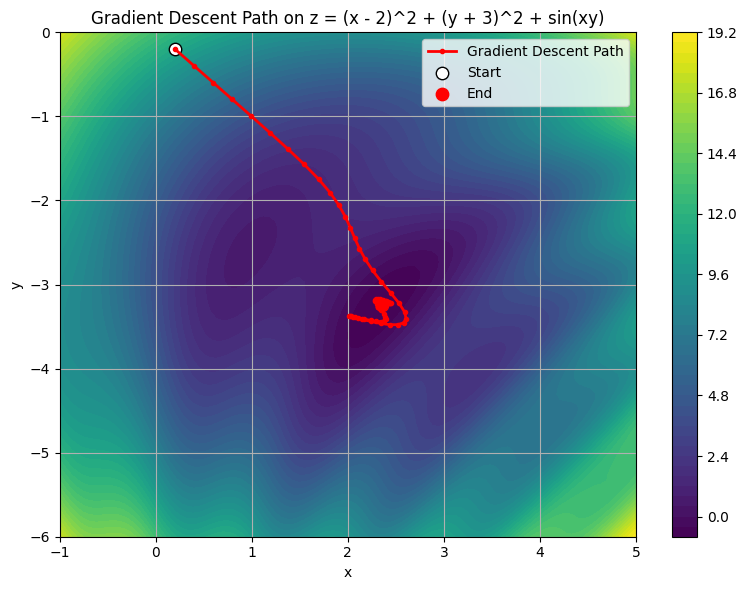

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 경로 저장 리스트
x_path = []
y_path = []

# 초기값 설정
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)
optimizer = torch.optim.Adam([x, y], lr=0.2) # 최적화 함수를 정의할때, 어떤 변수를 최적화 할건지, lr을 정의해줘야함

# 경사 하강법 실행
for _ in range(100):
    optimizer.zero_grad()
    z = (x - 2)**2 + (y + 3)**2 + torch.sin(x * y)
    z.backward()
    optimizer.step()

    # 현재 좌표 저장
    x_path.append(x.item())
    y_path.append(y.item())

# 그래프를 위한 mesh grid 준비
x_vals = np.linspace(-1, 5, 100)
y_vals = np.linspace(-6, 0, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 2)**2 + (Y + 3)**2 + np.sin(X * Y)

# 등고선과 이동 경로 그리기
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(x_path, y_path, color='red', marker='o', markersize=3, linewidth=2, label='Gradient Descent Path')
plt.scatter(x_path[0], y_path[0], color='white', edgecolors='black', s=80, label='Start')
plt.scatter(x_path[-1], y_path[-1], color='red', s=80, label='End')
plt.title("Gradient Descent Path on z = (x - 2)^2 + (y + 3)^2 + sin(xy)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


simple linear function 학습

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 생성: y = 3x + 1, 실제 그래프가 아니라 데이터들로 구성한 버전
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[4.0], [7.0], [10.0], [13.0]])  # 정답 y = 3x + 1

# 모델 정의: 입력 1차원 → 출력 1차원, 기울기와 편향을 최적화
model = nn.Linear(in_features=1, out_features=1)

# 손실 함수 및 옵티마이저
criterion = nn.MSELoss() # mean square error, 평균제곱오차, 손실함수
optimizer = optim.Adam(model.parameters(), lr=0.2)

# 학습
for epoch in range(200):
    # 순전파
    outputs = model(x_train)
    loss = criterion(outputs, y_train) # 실제값이랑 모델을 통해 나온 결괏값 사이 어떤 차이가 있는가

    # 역전파 (미분)
    optimizer.zero_grad()
    loss.backward() # 손실 함수에 대해서 미분값을 취해준다.
    optimizer.step() # 가중치 값에 변화를 준다

    # 로그 출력
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f}")

# 학습된 파라미터 확인
w = model.weight.item() # 이미 model안에 weigth랑 bias가 내장 되어 있음
b = model.bias.item()
print(f"\n학습된 파라미터: w = {w:.4f}, b = {b:.4f}")


Epoch  20 | Loss: 3.9428
Epoch  40 | Loss: 0.5509
Epoch  60 | Loss: 0.2114
Epoch  80 | Loss: 0.1039
Epoch 100 | Loss: 0.0505
Epoch 120 | Loss: 0.0240
Epoch 140 | Loss: 0.0109
Epoch 160 | Loss: 0.0045
Epoch 180 | Loss: 0.0017
Epoch 200 | Loss: 0.0006

학습된 파라미터: w = 2.9797, b = 1.0579


simple classification 학습

In [15]:
import torch
import torch.nn as nn # 인공신경망 모듈
import torch.optim as optim

# 데이터셋: 클래스 0, 1, 2, 실제 클래스에 대한 정답값
x_train = torch.tensor([
    [1.0, 1.0], [2.0, 1.0],   # 클래스 0
    [3.0, 5.0], [3.5, 4.5],   # 클래스 1
    [5.0, 1.0], [6.0, 2.0]    # 클래스 2    # 2차원 평면 위에 점들로 나타낼 수 있음, 영역을 나눔
])
y_train = torch.tensor([0, 0, 1, 1, 2, 2])  # 클래스 레이블

# 모델 정의: 2-layer MLP (Linear -> ReLU -> Linear), multi layer perception
model = nn.Sequential(
    nn.Linear(2, 10),   # 입력 2 → 은닉 10
    nn.ReLU(),  # 비선형성 추가, 곡선 분기점 경계 생성 가능
    nn.Linear(10, 3)    # 은닉 10 → 클래스 3
)
# 한 객체를 표현하는데 2개의 특징을 입력하면, 3개의 클래스 중에서 어떤게 정답값이 가장 높은지 알려주겠다
# 중간에 차원을 10개 늘리는건 다양한 특징 조합을 같이 학습시키기 위해서
# Cross-Entopy 함수 (Softmax 포함) 선언
criterion = nn.CrossEntropyLoss()

# Optimizer 선언
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습
for epoch in range(100):
    outputs = model(x_train)               # shape: [6, 3]
    loss = criterion(outputs, y_train)     # 손실함수 계산, 실제 라벨값이랑 얼마나 다른지

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        _, predicted = torch.max(outputs, 1)  # 안쓰는 변수니까 굳이 이름을 만들지 안겠다
        acc = (predicted == y_train).float().mean()  # 예측값과 실제값이 같으면 1(True) 반환
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f} | Accuracy: {acc:.2f}")

# 🔍 예측 확인
with torch.no_grad():
    test_x = torch.tensor([[1.5, 1.0], [3.2, 4.8], [5.5, 1.5]])
    logits = model(test_x)
    probs = torch.softmax(logits, dim=1)
    preds = torch.argmax(probs, dim=1)  # 가장 점수가 높은 인덱스를 반환
    print("\nTest Softmax Probs:\n", probs.numpy())
    print("Predicted Classes:", preds.numpy())


Epoch  10 | Loss: 0.9433 | Accuracy: 0.67
Epoch  20 | Loss: 0.7411 | Accuracy: 0.67
Epoch  30 | Loss: 0.5629 | Accuracy: 0.67
Epoch  40 | Loss: 0.4203 | Accuracy: 1.00
Epoch  50 | Loss: 0.2974 | Accuracy: 1.00
Epoch  60 | Loss: 0.1932 | Accuracy: 1.00
Epoch  70 | Loss: 0.1230 | Accuracy: 1.00
Epoch  80 | Loss: 0.0816 | Accuracy: 1.00
Epoch  90 | Loss: 0.0560 | Accuracy: 1.00
Epoch 100 | Loss: 0.0403 | Accuracy: 1.00

Test Softmax Probs:
 [[9.3402028e-01 4.7312226e-02 1.8667419e-02]
 [1.3239890e-02 9.8587346e-01 8.8658312e-04]
 [1.3451448e-02 2.0619079e-03 9.8448664e-01]]
Predicted Classes: [0 1 2]


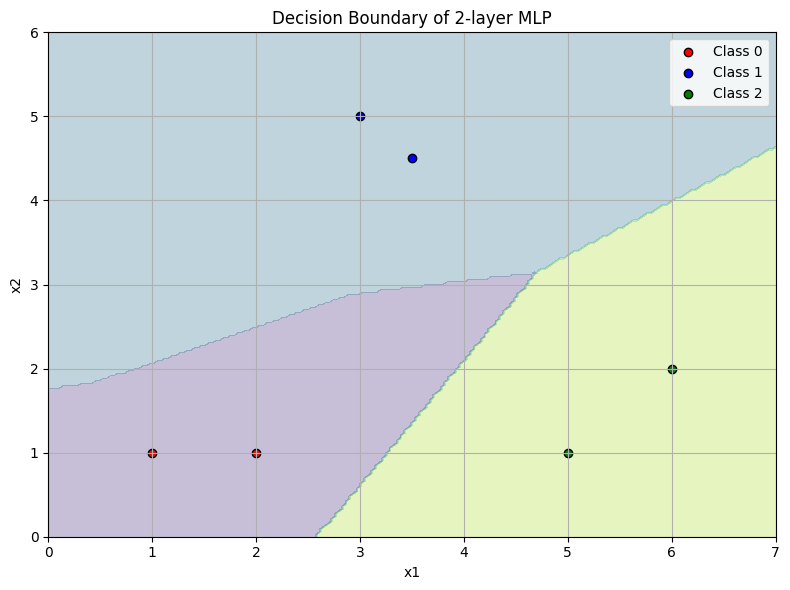

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

x_train = torch.tensor([
    [1.0, 1.0], [2.0, 1.0],   # 클래스 0
    [3.0, 5.0], [3.5, 4.5],   # 클래스 1
    [5.0, 1.0], [6.0, 2.0]    # 클래스 2
])
y_train = torch.tensor([0, 0, 1, 1, 2, 2])

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습
for epoch in range(100):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 시각화용 meshgrid 생성
x_min, x_max = 0, 7
y_min, y_max = 0, 6
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_
                                 max, 200))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
# ravel, 배열을 평탄하게 만들어주는 함수
# 모델 예측
with torch.no_grad():    # 역전파 하지마라, 그냥 추론만 할거니까, 미분값 계산하는걸 꺼버림
    logits = model(grid) # grid 전체를 모델의 입력값으로 넣겠다
    preds = torch.argmax(logits, dim=1).numpy()

# 배경 클래스 영역 색칠
Z = preds.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=3, cmap="viridis")

# 학습 데이터 산점도
colors = ['red', 'blue', 'green']
for i in range(3):
    idx = (y_train == i).numpy()
    plt.scatter(x_train[idx, 0], x_train[idx, 1], c=colors[i], label=f'Class {i}', edgecolor='k')

plt.title("Decision Boundary of 2-layer MLP")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn

# 1채널, 7x7 이미지 하나 (배치 크기 = 1)
input_image = torch.tensor([[[[0, 0, 1, 1, 1, 0, 0],
                              [0, 1, 1, 1, 1, 1, 0],
                              [1, 1, 1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1, 1, 1],
                              [0, 1, 1, 1, 1, 1, 0],
                              [0, 0, 1, 1, 1, 0, 0]]]], dtype=torch.float32)

print("입력 크기:", input_image.shape)  # [1, 1, 7, 7]

# 수동으로 Conv 필터 값 설정
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=0, bias=False)

# 수동으로 Conv 필터 값 설정
with torch.no_grad():
    conv.weight[:] = torch.tensor([[[[-1, -1, -1],
                                     [-1,  8, -1],
                                     [-1, -1, -1]]]])  # 라플라시안 필터

# 합성곱 수행
output = conv(input_image)
print("출력 크기:", output.shape)  # [1, 1, 7, 7]
print("출력 Feature Map:\n", output.squeeze())


입력 크기: torch.Size([1, 1, 7, 7])
출력 크기: torch.Size([1, 1, 5, 5])
출력 Feature Map:
 tensor([[3., 1., 0., 1., 3.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [3., 1., 0., 1., 3.]], grad_fn=<SqueezeBackward0>)


In [ ]:
import torch
import torch.nn as nn

# 1채널, 7x7 이미지 하나 (배치 크기 = 1)
input_image = torch.tensor([[[[0, 0, 1, 1, 1, 0, 0],
                              [0, 1, 1, 1, 1, 1, 0],
                              [1, 1, 1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1, 1, 1],
                              [0, 1, 1, 1, 1, 1, 0],
                              [0, 0, 1, 1, 1, 0, 0]]]], dtype=torch.float32)

print("입력 크기:", input_image.shape)  # [1, 1, 7, 7]

# 간단한 1개의 Conv 필터 (엣지 검출)
# 패딩을 하고 안하고의 차이가 있음. 정보의 손실을 최소화 하기 위해서 패딩의 작업이 필요하다.
# 실제로 위에서 컨벌루션 필터 적용한거랑 다름
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# 커널을 수동으로 설정
with torch.no_grad():
    conv.weight[:] = torch.tensor([[[[-1, -1, -1],
                                     [-1,  8, -1],
                                     [-1, -1, -1]]]])  # 라플라시안 필터

# 합성곱 수행
output = conv(input_image)
print("출력 크기:", output.shape)  # [1, 1, 7, 7]
print("출력 Feature Map:\n", output.squeeze())


입력 크기: torch.Size([1, 1, 7, 7])
출력 크기: torch.Size([1, 1, 7, 7])
출력 Feature Map:
 tensor([[-1., -3.,  4.,  3.,  4., -3., -1.],
        [-3.,  3.,  1.,  0.,  1.,  3., -3.],
        [ 4.,  1.,  0.,  0.,  0.,  1.,  4.],
        [ 3.,  0.,  0.,  0.,  0.,  0.,  3.],
        [ 4.,  1.,  0.,  0.,  0.,  1.,  4.],
        [-3.,  3.,  1.,  0.,  1.,  3., -3.],
        [-1., -3.,  4.,  3.,  4., -3., -1.]], grad_fn=<SqueezeBackward0>)


100%|██████████| 170M/170M [00:12<00:00, 13.2MB/s]


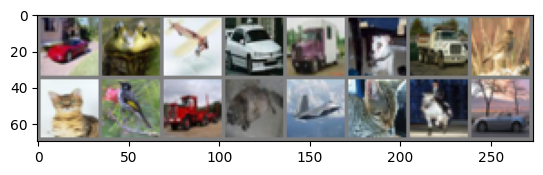

car   frog  plane car   truck dog   truck bird  cat   bird  truck cat   plane cat   horse car  


100%|██████████| 3125/3125 [00:19<00:00, 160.65it/s]


Epoch 1: Train Loss = 2.1468, Test Acc = 0.2594


100%|██████████| 3125/3125 [00:18<00:00, 167.59it/s]


Epoch 2: Train Loss = 1.9476, Test Acc = 0.3325


100%|██████████| 3125/3125 [00:18<00:00, 170.74it/s]


Epoch 3: Train Loss = 1.8013, Test Acc = 0.3537


100%|██████████| 3125/3125 [00:18<00:00, 173.13it/s]


Epoch 4: Train Loss = 1.7162, Test Acc = 0.3853


100%|██████████| 3125/3125 [00:18<00:00, 169.70it/s]


Epoch 5: Train Loss = 1.6593, Test Acc = 0.4065


100%|██████████| 3125/3125 [00:19<00:00, 160.96it/s]


Epoch 6: Train Loss = 1.6080, Test Acc = 0.4313


100%|██████████| 3125/3125 [00:18<00:00, 171.73it/s]


Epoch 7: Train Loss = 1.5618, Test Acc = 0.4484


100%|██████████| 3125/3125 [00:18<00:00, 172.79it/s]


Epoch 8: Train Loss = 1.5197, Test Acc = 0.4625


100%|██████████| 3125/3125 [00:18<00:00, 168.60it/s]


Epoch 9: Train Loss = 1.4823, Test Acc = 0.4772


100%|██████████| 3125/3125 [00:18<00:00, 165.64it/s]


Epoch 10: Train Loss = 1.4505, Test Acc = 0.4783


In [ ]:
# CIFAR-10 CNN 실습 템플릿 (Augmentation 없음)

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 1. 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # RGB 채널 정규화
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_batch_size = 16
test_batch_size = 16

train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=test_batch_size, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(train_batch_size)))

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling → [B, 64, 1, 1]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),                  # → [B, 64]
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 3. 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# 4. 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return correct / total

# 5. 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Acc = {test_acc:.4f}")


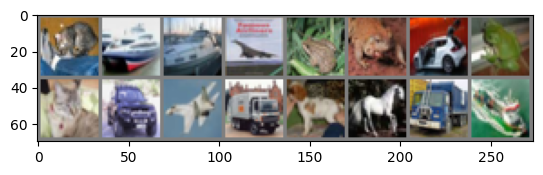

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 
Predicted:  frog  ship  ship  ship 


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(test_batch_size)))

images = images.to(device)
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


In [ ]:

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 미분 계산 필요없ㅇ ㅁ
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        # 신경망에 이미지를 통과시켜 출력을 계산
        outputs = model(images)
        # 가장 높은 값을 갖는 분류(class)를 정답으로 선택
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모음
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')



Accuracy of the network on the 10000 test images: 47 %
Accuracy for class: plane is 65.6 %
Accuracy for class: car   is 62.3 %
Accuracy for class: bird  is 27.3 %
Accuracy for class: cat   is 9.3 %
Accuracy for class: deer  is 43.0 %
Accuracy for class: dog   is 50.5 %
Accuracy for class: frog  is 69.4 %
Accuracy for class: horse is 56.7 %
Accuracy for class: ship  is 45.4 %
Accuracy for class: truck is 48.8 %
